# PyTorch Data Preprocess

In [2]:
import torch

from torchvision import datasets, transforms

### Data Loader 부르기

파이토치는 DataLoader를 불러 model에 넣음

In [3]:
batch_size = 32
test_batch_size=32

In [9]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('C:/Users/신상훈/Desktop/새 폴더/dataset',train = True,download=True,
                  transform=transforms.Compose([transforms.ToTensor(),
                                              transforms.Normalize(mean=(0.5),std=(0.5))])),
                    batch_size=32,shuffle=True)

In [10]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('C:/Users/신상훈/Desktop/새 폴더/dataset', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5))
                   ])),
    batch_size=test_batch_size,
    shuffle=True)

### 첫번재 iteration에서 나오는 데이터 확인

In [11]:
images, labels = next(iter(train_loader))

In [12]:
images.shape

torch.Size([32, 1, 28, 28])

In [13]:
labels.shape

torch.Size([32])

### 데이터 시각화

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
images[0].shape

torch.Size([1, 28, 28])

In [16]:
torch_images = torch.squeeze(images[0])

In [17]:
torch_images.shape

torch.Size([28, 28])

In [18]:
image = torch_images.numpy()
image.shape

(28, 28)

In [19]:
label = labels[0].numpy()
label.shape

()

In [21]:
label

array(1, dtype=int64)

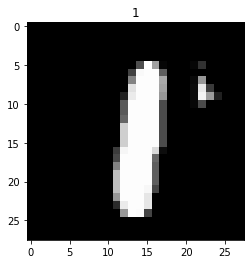

In [22]:
plt.title(label)
plt.imshow(image,'gray')
plt.show()

# PyTorch Layer 이해하기

In [24]:
import torch
from torchvision import datasets, transforms

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=1)

Extracting dataset\MNIST\raw\train-images-idx3-ubyte.gz to dataset\MNIST\raw


Extracting dataset\MNIST\raw\train-labels-idx1-ubyte.gz to dataset\MNIST\raw



Extracting dataset\MNIST\raw\t10k-images-idx3-ubyte.gz to dataset\MNIST\raw


Extracting dataset\MNIST\raw\t10k-labels-idx1-ubyte.gz to dataset\MNIST\raw
Processing...
Done!


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [27]:
image, label = next(iter(train_loader))

In [28]:
image.shape, label.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

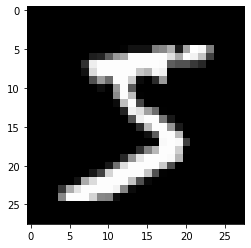

In [29]:
plt.imshow(image[0, 0, :, :], 'gray')
plt.show()

# 각 Layer별 설명

- Network 쌓기 위한 준비

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### Convolution

- in_channels: 받게 될 channel의 갯수
- out_channels: 보내고 싶은 channel의 갯수  
- kernel_size: 만들고 싶은 kernel(weights)의 사이즈

In [31]:
nn.Conv2d(in_channels=1,out_channels=20,kernel_size=5,stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [32]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- weight 시각화를 위해 slice하고 numpy화

In [37]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- 여기서 weight는 학습 가능한 상태이기 때문에 바로 numpy로 뽑아낼 수 없음
- detach() method는 그래프에서 잠깐 빼서 gradient에 영향을 받지 않게 함

In [38]:
weight = weight.detach().numpy()

In [40]:
weight.shape

(20, 1, 5, 5)

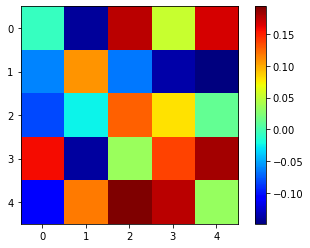

In [41]:
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show()

- output 시각화 준비를 위해 numpy화

In [42]:
output_data = layer(image)

In [45]:
output_data = output_data.data

In [57]:
output = output_data.cpu().numpy()


In [58]:
output.shape

(1, 20, 24, 24)

- Input으로 들어간 이미지 numpy화 

In [59]:
image_arr = image.numpy()
image_arr.shape

(1, 1, 28, 28)

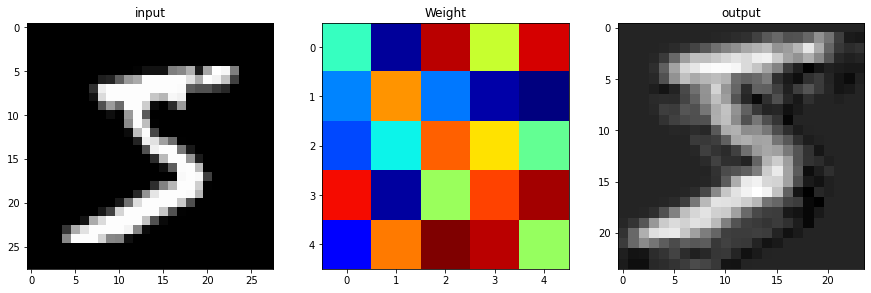

In [60]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title('input')
plt.imshow(np.squeeze(image_arr),'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:],'jet')
plt.subplot(133)
plt.title('output')
plt.imshow(output[0,0,:,:],'gray')
plt.show()

### Pooling

input을 먼저 앞에 넣고, 뒤에 kernel 사이즈와 stride를 순서대로 넣음

In [61]:
image.shape

torch.Size([1, 1, 28, 28])

In [63]:
pool = F.max_pool2d(image,2,2)
pool.shape

torch.Size([1, 1, 14, 14])

- MaxPool Layer는 weight가 없기 때문에 바로 numpy()가 가능

In [65]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 1, 14, 14)

In [66]:
image_arr.shape

(1, 1, 28, 28)

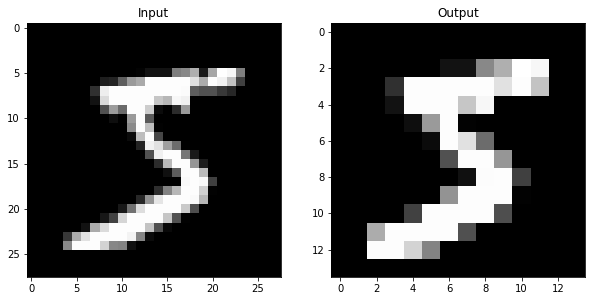

In [67]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title("Input")
plt.imshow(np.squeeze(image_arr), 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(np.squeeze(pool_arr), 'gray')
plt.show()

### Linear

nn.Linear는 2d가 아닌 1d만 들어가기 때문에 .view() 1D로 펼쳐줘야함

In [69]:
image.shape

torch.Size([1, 1, 28, 28])

In [71]:
flatten = image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [73]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [74]:
lin

tensor([[ 0.0476,  0.2298, -0.1550, -0.2901,  0.2281, -0.1504,  0.2159,  0.1506,
         -0.0458,  0.1281]], grad_fn=<AddmmBackward>)

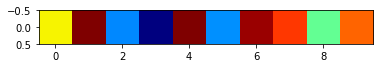

In [76]:
plt.imshow(lin.detach().numpy(),'jet')
plt.show()

### Softmax

결과를 numpy로 꺼내기 위해선 weight가 담긴 Linear에 weight를 꺼줘야함

In [78]:
with torch.no_grad():
    flatten = image.view(1, 28 * 28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [79]:
softmax

tensor([[0.1012, 0.0824, 0.1019, 0.0759, 0.1217, 0.0742, 0.0929, 0.0860, 0.1193,
         0.1445]])

In [80]:
np.sum(softmax.numpy())

1.0

# Layer 쌓기

예제 출처: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#id23

nn 과 nn.functional의 차이점
- nn은 학습 파라미터가 담긴 것 
- nn.functional은 학습 파라미터가 없는 것이라 생각하면 간단

In [81]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        # Feature Extraction
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        
        # Fully Connected (Classficiation)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

- Image를 Model에 넣어서 결과 확인

In [82]:
model = Net()

In [83]:
result = model.forward(image)

In [84]:
result

tensor([[-2.2711, -2.3276, -2.4233, -2.3081, -2.2929, -2.2502, -2.2365, -2.3017,
         -2.3438, -2.2831]], grad_fn=<LogSoftmaxBackward>)